In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_281.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_256.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_301.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_253.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_265.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_286.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_248.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_287.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_264.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_288.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_282.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_278.png
/kaggle/input/cataract-image-dataset/pro

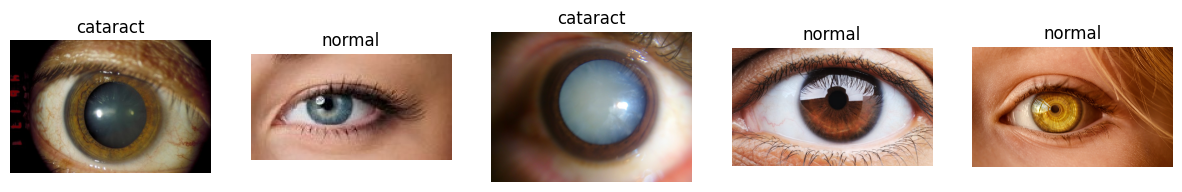

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the main folder path
folder_path = "/kaggle/input/cataract-image-dataset/processed_images/train"

# Get all subfolders (categories)
categories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

# Collect image paths and labels
image_list = []
for category in categories:
    category_path = os.path.join(folder_path, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('png', 'jpg', 'jpeg'))]
    
    # Store full image paths and their labels (folder names)
    image_list.extend([(os.path.join(category_path, img), category) for img in image_files])

# Ensure we have enough images
num_images = min(5, len(image_list))  # Take at most 5 images

if num_images == 0:
    print("No images found in the dataset!")
else:
    selected_images = random.sample(image_list, num_images)

    # Display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for ax, (img_path, label) in zip(axes, selected_images):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(label)  # Label as per folder name
        ax.axis('off')

    plt.show()


In [3]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

input_shape = (224, 224, 3)




from tensorflow.keras import models, layers

# Define the model (e.g., a simple CNN model)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5992 - loss: 1.4899 - val_accuracy: 0.5785 - val_loss: 0.6546
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7188 - loss: 0.5507 - val_accuracy: 0.8017 - val_loss: 0.4090
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8596 - loss: 0.3421 - val_accuracy: 0.8926 - val_loss: 0.2981
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9111 - loss: 0.2503 - val_accuracy: 0.8926 - val_loss: 0.2958
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9223 - loss: 0.1689 - val_accuracy: 0.8595 - val_loss: 0.3387
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9375 - loss: 0.1664 - val_accuracy: 0.9256 - val_loss: 0.2712
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9766 - loss: 0.1028 - val_accuracy: 0.9256 - val_loss: 0.2937
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9762 - loss: 0.0657 - val_accuracy: 0.9587 - val_loss: 0.2533
Epo

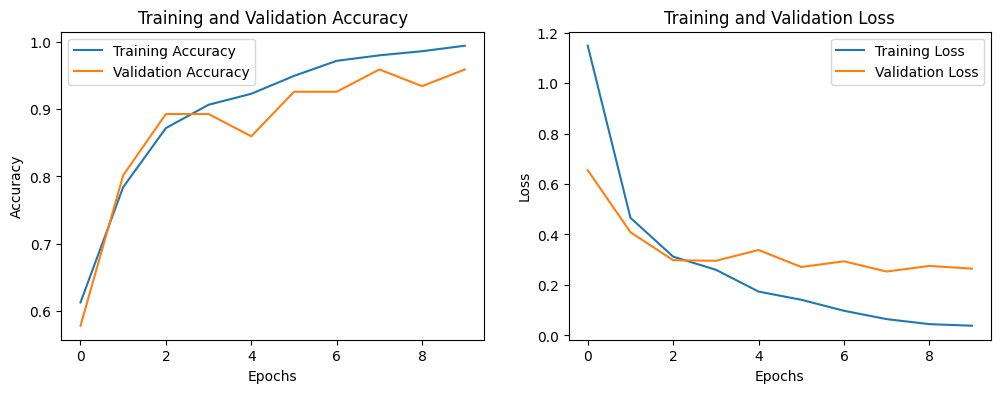

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9626 - loss: 0.1667
Test Accuracy: 95.87%


In [8]:
import tensorflow as tf

# Save the model in .h5 format
model.save('model.h5')


In [9]:
from keras.preprocessing import image
label = train_generator.class_indices
print(type(label))
print(label)

<class 'dict'>
{'cataract': 0, 'normal': 1}


In [10]:
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess test image
path="/kaggle/input/cataract-image-dataset/processed_images/test/cataract/image_249.png"
img = image.load_img(path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
print(predictions)  # Check the output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[2.3190839e-07]]


Predicted Class: Cataract


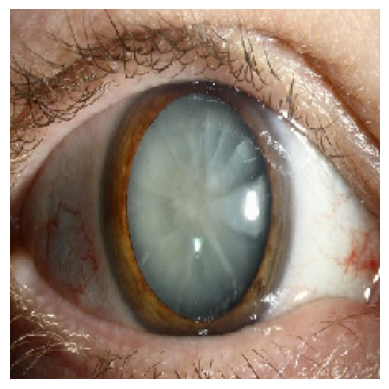

In [12]:
predicted_class = "Cataract" if predictions[0][0] < 0.5 else "Normal"
print(f"Predicted Class: {predicted_class}")
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess test image
path="/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_256.png"
img = image.load_img(path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
print(predictions)  # Check the output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.99666315]]


Predicted Class: Normal


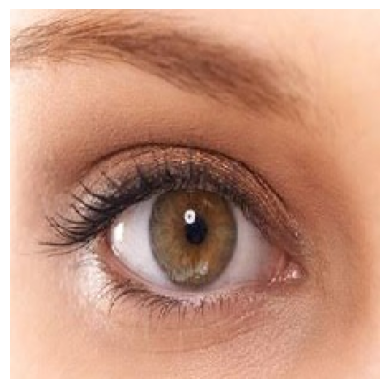

In [14]:
predicted_class = "Cataract" if predictions[0][0] < 0.5 else "Normal"
print(f"Predicted Class: {predicted_class}")
plt.imshow(img)
plt.axis("off")
plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test data path
test_dir = "/kaggle/input/cataract-image-dataset/processed_images/test/"

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Match the input size of your model
    batch_size=32,
    class_mode="binary",  # Since it's binary classification
    shuffle=False
)

# Evaluate Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 121 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9647 - loss: 0.1984    
Test Accuracy: 95.87%


In [22]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Define test dataset path
test_dir = "/kaggle/input/cataract-image-dataset/processed_images/test/"

# Store results
results = []

# Loop through both classes (Cataract, Normal)
for class_name in ["cataract", "normal"]:
    class_dir = os.path.join(test_dir, class_name)
    
    # Loop through each image in the class folder
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if needed
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
        
        # Predict
        prediction = model.predict(img_array)[0][0]  # Get probability
        predicted_label = "cataract" if prediction < 0.5 else "normal"
        
        # Store result
        results.append((img_name, class_name, predicted_label, prediction))

# Convert results to DataFrame
df = pd.DataFrame(results, columns=["Image_Name", "True_Label", "Predicted_Label", "Confidence_Score"])

# Save predictions to CSV
df.to_csv("/kaggle/working/test_predictions.csv", index=False)

# Show sample results
df.head(10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

,Image_Name,True_Label,Predicted_Label,Confidence_Score
0,image_281.png,cataract,cataract,0.000134
1,image_256.png,cataract,cataract,0.006287
2,image_301.png,cataract,cataract,0.001526
3,image_253.png,cataract,normal,0.544755
4,image_265.png,cataract,cataract,0.004993
5,image_286.png,cataract,cataract,0.000006
6,image_248.png,cataract,cataract,0.000234
7,image_287.png,cataract,cataract,0.007373
8,image_264.png,cataract,cataract,0.001248
9,image_288.png,cataract,cataract,0.011543


In [23]:
wrong_preds = df[df["True_Label"] != df["Predicted_Label"]]
print(wrong_preds.head(10))

        Image_Name True_Label Predicted_Label  Confidence_Score
3    image_253.png   cataract          normal          0.544755
58   image_291.png   cataract          normal          0.999975
107  image_296.png     normal        cataract          0.443941
112  image_289.png     normal        cataract          0.000019
117  image_257.png     normal        cataract          0.005051


In [24]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(df['True_Label']), list(df['Predicted_Label'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [25]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [26]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [27]:
evaluation_summary

,accuracy,precision,recall,f1
0,0.958678,0.95,0.966102,0.957983


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_generator)  
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 938ms/step
Confusion Matrix
[[61  0]
 [60  0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


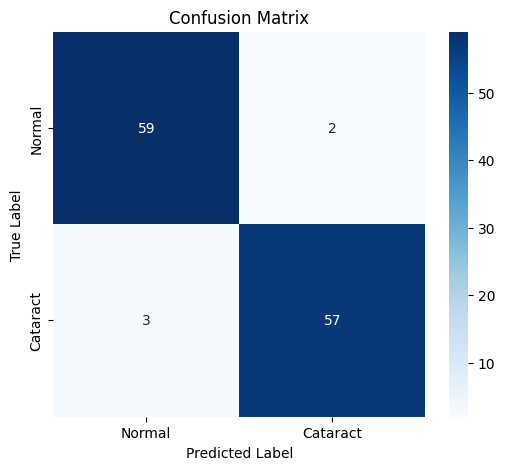

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = []
predictions = []

# Iterate through test generator batches
for x, y in test_generator:
    true_labels.extend(y)  # Collect true labels
    predictions.extend(model.predict(x))  # Predict

    # Stop when all test samples are processed
    if len(true_labels) >= test_generator.samples:
        break

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Ensure correct shapes
if true_labels.ndim > 1:  
    true_labels = np.argmax(true_labels, axis=1)  # If one-hot encoded

# Convert predictions to binary values (for binary classification)
binary_predictions = np.round(predictions).astype(int)

# Compute confusion matrix
conf_mat = confusion_matrix(true_labels, binary_predictions)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Cataract'], 
            yticklabels=['Normal', 'Cataract'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Ensure predictions are binary
binary_predictions = np.round(predictions)

# Generate the classification report
print(classification_report(true_labels, binary_predictions, target_names=['normal', 'cataract']))


              precision    recall  f1-score   support

      normal       0.95      0.97      0.96        61
    cataract       0.97      0.95      0.96        60

    accuracy                           0.96       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.96      0.96      0.96       121



In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess test image
path="/kaggle/input/darshan/IMG20250409094415.jpg"
img = image.load_img(path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
print(predictions)  # Check the output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.99998987]]


Predicted Class: Normal


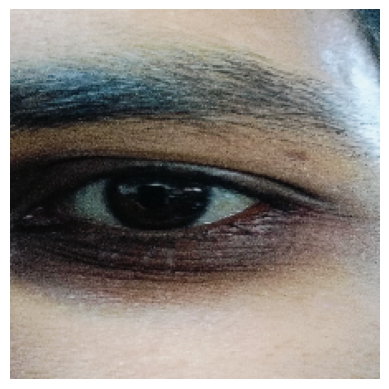

In [16]:
predicted_class = "Cataract" if predictions[0][0] < 0.5 else "Normal"
print(f"Predicted Class: {predicted_class}")
plt.imshow(img)
plt.axis("off")
plt.show()

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess test image
path="/kaggle/input/krishpatel/IMG20250409095137.jpg"
img = image.load_img(path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
print(predictions)  # Check the output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.99999946]]


Predicted Class: Normal


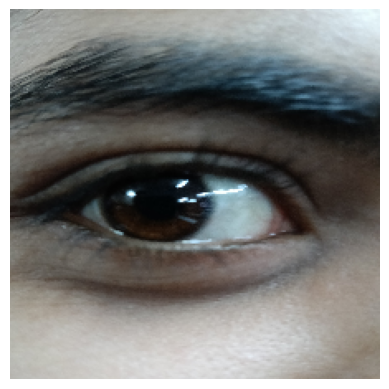

In [18]:
predicted_class = "Cataract" if predictions[0][0] < 0.5 else "Normal"
print(f"Predicted Class: {predicted_class}")
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess test image
path="/kaggle/input/parvshekh/IMG20250409095126.jpg"
img = image.load_img(path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
print(predictions)  # Check the output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.9999065]]


Predicted Class: Normal


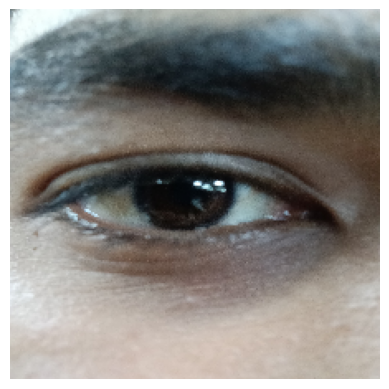

In [20]:
predicted_class = "Cataract" if predictions[0][0] < 0.5 else "Normal"
print(f"Predicted Class: {predicted_class}")
plt.imshow(img)
plt.axis("off")
plt.show()